# The Global Power Plant Project

**Prepared for FLIP ROBO by Olumide Ikumapayi-DS2306**

# About The Global Power Plant Dataset

The Global Power Plant Database is an extensive and publicly accessible database of power plants worldwide. It serves as a central repository of power plant information, facilitating easier navigation, comparison, and analysis. This database encompasses around 35,000 power plants from 167 different countries, encompassing both thermal and renewable energy sources. Thermal plants include coal, gas, oil, nuclear, biomass, waste, and geothermal energy sources, while renewables include hydro, wind, and solar energy sources. Each power plant entry in the database includes its geographical location as well as details on its capacity, generation capacity, ownership information, and fuel type. The database will regularly be updated with new data as it becomes available.

Please check the following link for more information regarding the dataset:https://github.com/wri/global-power-plant-database/blob/master/source_databases_csv/database_IND.csv

The flow of this machine learning exercise is as follows:

1. [Import Necessary Libraries](#Import-Necessary-Libraries)
2. [Loading the Global Power Plant Dataset](#Loading-the-Global-Power-Plant-Dataset)
3. [Exploratory Data Analysis(EDA)](#Exploratory-Data-Analysis-(EDA))
4. [Description of Dataset](#Description-of-Dataset)
5. [Bivariate Analysis](#Bivariate-Analysis)
6. [Converting categorical to numerical using LabelEncoder](Converting-categorical-to-numerical-using-LabelEncoder)
7. [Checking for and Removing the Outliers](Checking-for-and-Removing-the-Outliers)
8. [Checking the zscore](Checking-the-zscore)
9. [Checking for and Handling Skewness](Checking-for-and-Handling-Skewness)
10. [VARIABLE SPLITING INTO TARGET(Y) AND FEATURES(X)](VARIABLE-SPLITING-INTO-TARGET(Y)-AND-FEATURES(X))
11. [SPLIT INTO TRAIN AND TEST USING THE 70:30 RULE](SPLIT-INTO-TRAIN-AND-TEST-USING-THE-70-:-30-RULE)
12. [The Machine Learning Model Training,Evaluation and Predictions](#The-Machine-Learning-Model-Training,-Evaluation-and-Predictions)
13. [Cross Validation](Cross-Validation)
14. [Summary and Conclusion](Summary-and-Conclusion)


# Import Necessary Libraries

Importing all necessary libraries for data manipulation, visualization, and machine learning(ML).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from mlxtend.plotting import plot_decision_regions
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

# Loading the Global Power Plant Dataset

In [2]:
url = "https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.59665,865.4,686.5,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis(EDA)

In [5]:
df.shape

(907, 27)

This set of data comprises 907 rows and 27 columns, with one column designated as the target variable and the remaining 26 columns serving as independent variables.

**Brief description of the key attributes of the database**

**Independent Variables**:
    
1. **country (text)**: 3 character country code corresponding to the ISO 3166-1 alpha-3 specification.
2. **country_long (text)**: Longer form of the country designation.
3. **name (text)**: Name or title of the power plant, generally in Romanized form.
4. **gppd_idnr (text)**: 10 or 12 character identifier for the power plant.
5. **latitude (number)**: Geolocation in decimal degrees; WGS84 (EPSG:4326).
6. **longitude (number)**: Geolocation in decimal degrees; WGS84 (EPSG:4326).
7. **commissioning_year (number)**: Year of plant operation, weighted by unit-capacity when data is available.
8. **owner (text)**: Majority shareholder of the power plant, generally in Romanized form.
9. **source (text)**: Entity reporting the data; could be an organization, report, or document, generally in Romanized form.
10.**url (text)**: Web document corresponding to the source field.
11.**geolocation_source (text)**: Attribution for geolocation information.
12.**wepp_id (text)**: A reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
13.**year_of_capacity_data (number)**: Year the capacity information was reported.
14.**generation_gwh_2013 to generation_gwh_2019 (number)**: Electricity generation in gigawatt-hours reported for each year from 2013 to 2019.
15.**generation_data_source (text)**: Attribution for the reported generation information.
16.**estimated_generation_gwh_2013 to estimated_generation_gwh_2017 (number)**: Estimated electricity generation in gigawatt-hours for each year from 2013 to 2017.
17.**estimated_generation_note_2013 to estimated_generation_note_2017 (text)**: Label of the model/method used to estimate generation for each year from 2013 to 2017.

**Dependent Variable**:

1. **primary_fuel (text)**: Energy source used in primary electricity generation or export.
2. **capacity_mw (number)**: Electrical generating capacity in megawatts.

These variables represents the primary fuel type of a power plant and its electrical generating capacity, respectively.They are the variables we shall be analyzing and base our predictions.


All The variables provide a wealth of information about each power plant, including its location, ownership, operational history, and reported and estimated electricity generation.Hence,the independent variables will be used to predict and analyze the dependent variables, which are primary_fuel and capacity_mw.

In [6]:
# Lets check the null values 
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

There are missing values in the Data Set

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

There three(3) different types of data(object,float64 and int32) present in the dataset.

We will therefore eliminate columns with the highest number of null values, as filling in those values would lead to inaccurate predictions.

In [8]:
# Removing columns with null values
df.drop(['estimated_generation_gwh', 'generation_gwh_2019','generation_gwh_2013','wepp_id','other_fuel3','other_fuel1','other_fuel2'],axis=1,inplace=True)

In [9]:
# Lets check the null values again
df.isnull().sum()

country                     0
country_long                0
name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
owner                     565
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [10]:
# We can as well remove unwanted columns
df.drop(['gppd_idnr','owner','generation_data_source'],axis=1,inplace=True)

In [11]:
# Checking the null values again
df.isnull().sum()

country                    0
country_long               0
name                       0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
generation_gwh_2014      509
generation_gwh_2015      485
generation_gwh_2016      473
generation_gwh_2017      467
generation_gwh_2018      459
dtype: int64

In [12]:
# Statistical summary of numerical columns
df.describe()

,capacity_mw,latitude,longitude,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
count,907.000000,861.000000,861.000000,527.000000,519.0,398.000000,422.000000,434.000000,440.000000,448.000000
mean,326.223755,21.197918,77.464907,1997.091082,2019.0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
std,590.085456,6.239612,4.939316,17.082868,0.0,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456
min,0.000000,8.168900,68.644700,1927.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.773900,74.256200,1988.000000,2019.0,223.557672,176.381063,188.285252,177.874930,193.378250
50%,59.200000,21.780000,76.719500,2001.000000,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
75%,385.250000,25.512400,79.440800,2012.000000,2019.0,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900
max,4760.000000,34.649000,95.408000,2018.000000,2019.0,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000


In [13]:
# Checking number of unique values in each column
df.nunique().to_frame("No.of unique values")

,No.of unique values
country,1
country_long,1
name,907
capacity_mw,361
latitude,836
longitude,827
primary_fuel,8
commissioning_year,73
source,191
url,304


In [14]:
# Accessing the columns and get the number of unique values
unique_values = df[['year_of_capacity_data', 'name']].nunique()
print(unique_values)

year_of_capacity_data      1
name                     907
dtype: int64


In [15]:
# Dropping name  and url column as well
df.drop(['name','url'],axis=1,inplace=True)

In [16]:
# Unique Values in the 'geolocation_source' Column
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', nan,
       'Industry About'], dtype=object)

In [17]:
# Populating the geolocation_source with mode based on the category Data.
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace=True)

In [18]:
# Dropping the'year_of_capacity_data column
df.drop('year_of_capacity_data',axis=1,inplace=True)

In [19]:
# lets fill the null values in the numerical columns with median 
df.fillna(df.median()[0], inplace=True)

In [20]:
# lets Check the null values again
df.isnull().sum()

country                0
country_long           0
capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

The null values has been removed

In [21]:
df[['geolocation_source', 'source', 'country_long', 'country']].nunique()

geolocation_source      3
source                191
country_long            1
country                 1
dtype: int64

In [22]:
# Dropping the country and country long columns
df.drop(['country','country_long'],axis=1,inplace=True)

In [23]:
# Getting a good overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


As we can see there are no null values present in this dataset.

<AxesSubplot:>

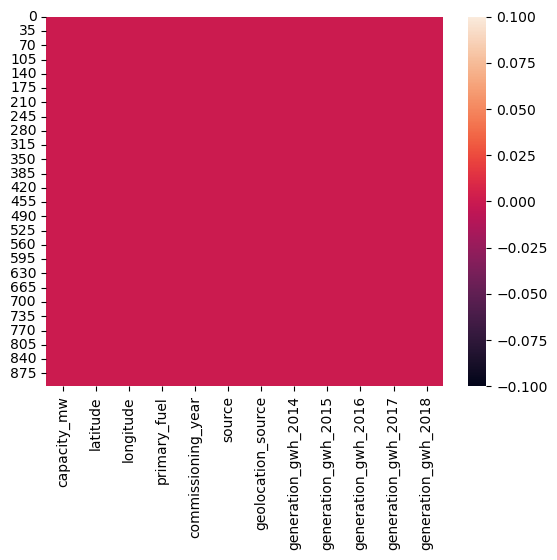

In [24]:
#Lets visualize it using heatmap
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

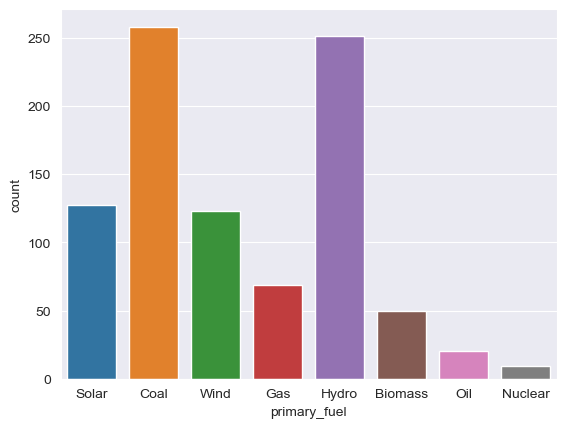

In [25]:
#Visualize the count of primary fuel
sns.set_style("darkgrid")
sns.countplot(x="primary_fuel", data=df)

# Description of Dataset

In [26]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,59.200000,59.200,59.200000,59.200000,59.200000
1,98.0,24.7663,74.6090,Coal,59.2,Ultratech Cement ltd,WRI,59.200000,59.200,59.200000,59.200000,59.200000
2,39.2,21.9038,69.3732,Wind,59.2,CDM,WRI,59.200000,59.200,59.200000,59.200000,59.200000
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


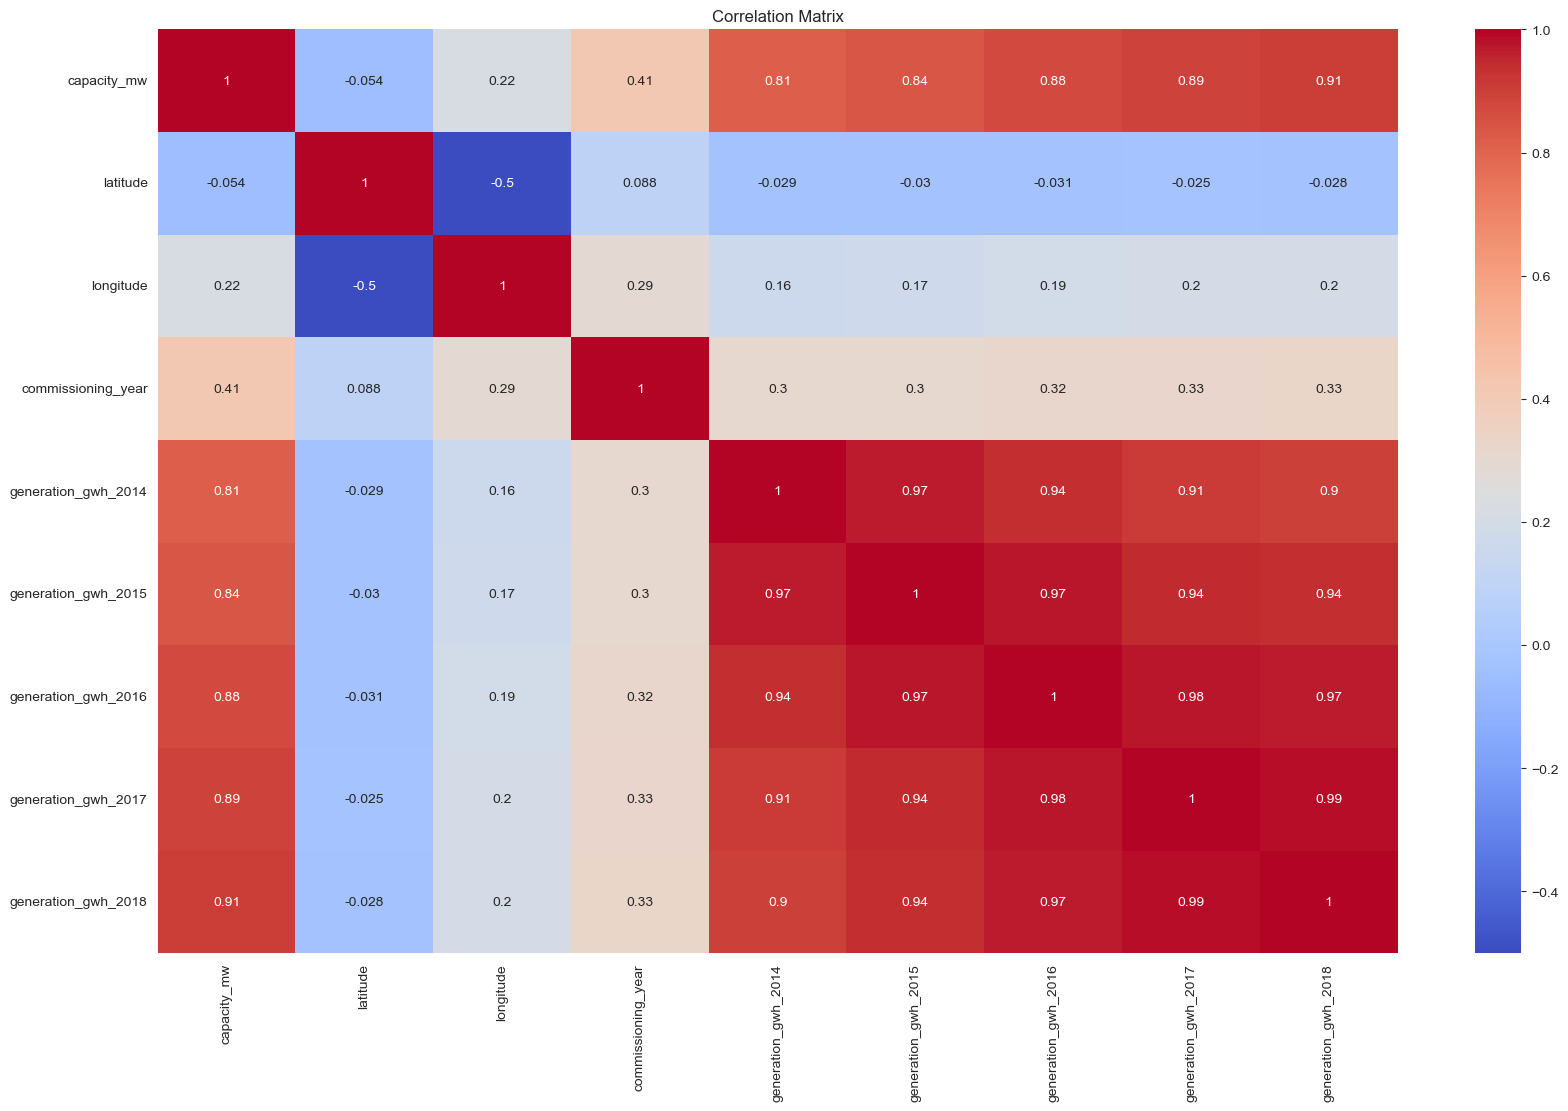

In [27]:
# Correlation matrix to identify potential features
correlation_matrix = df.corr()
plt.figure(figsize=(20, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Here, longitude, generation_gwh 2014,2015,2016,2017,2018 and capacity_mw are positively correlated with each other while the latitude is negatively correlated 

**Bivariate Analysis**

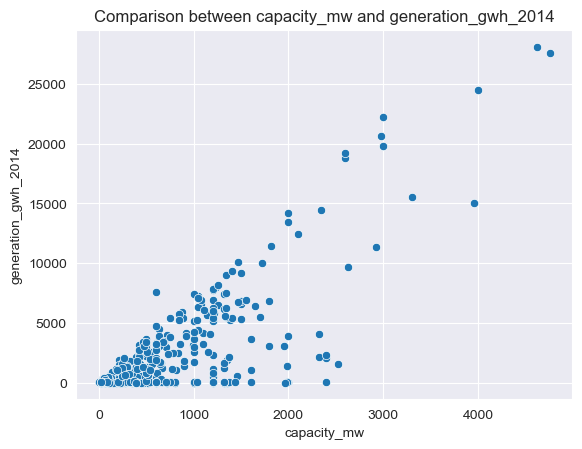

In [28]:
# Comparing capacity_mw and generation_gwh_2014
plt.title("Comparison between capacity_mw and generation_gwh_2014")
sns.scatterplot(x = "capacity_mw", y = "generation_gwh_2014", data = df)
plt.show()

Here, we observe a simultaneous rise in electricity generation measured in gigawatt-hours(i.e.above 25000gwh) and an increase in the electrical generating capacity, measured in megawatts, during the year 2014.

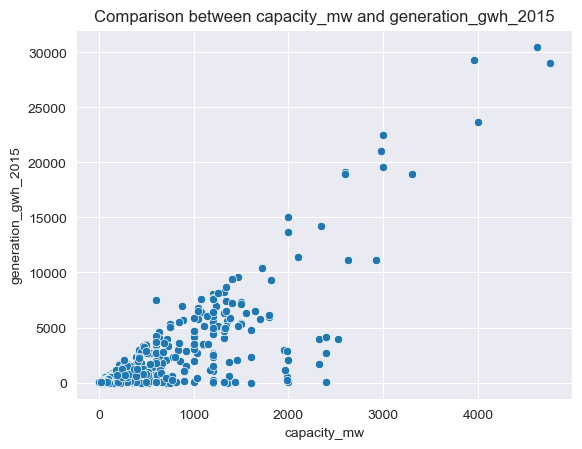

In [29]:
# Comparing capacity_mw and generation_gwh_2015
plt.title("Comparison between capacity_mw and generation_gwh_2015")
sns.scatterplot(x = 'capacity_mw', y = 'generation_gwh_2015', data = df,)
plt.show()

In 2015, a discernible trend emerges as electricity generation in gigawatt-hours and the number of electrical generating capacities in megawatts both experience significant growth, with the latter reaching nearly 5000 by the end of the year.

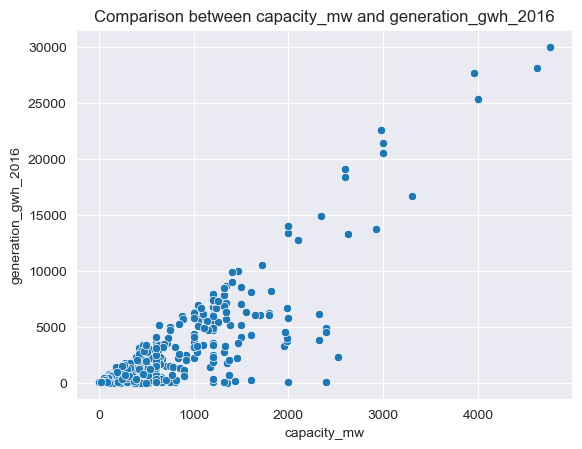

In [30]:
# Comparing capacity_mw and generation_gwh_2016
plt.title("Comparison between capacity_mw and generation_gwh_2016")
sns.scatterplot(x = 'capacity_mw', y = 'generation_gwh_2016', data = df,)
plt.show()

In 2016, a similar trend was observed, with the generation of electricity in gigawatt-hours increasing alongside a rise in the electrical generating capacity in megawatts.

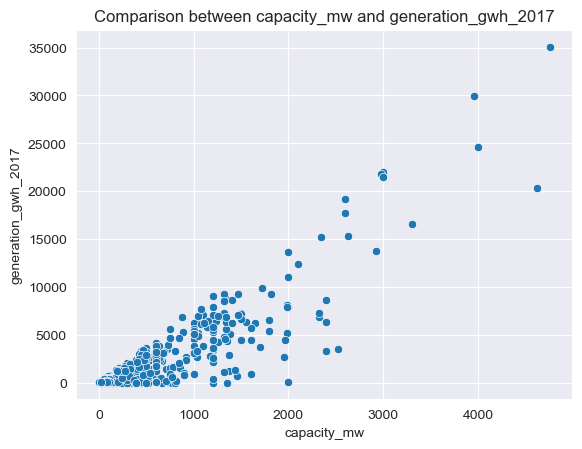

In [31]:
# Comparing capacity_mw and generation_gwh_2017
plt.title("Comparison between capacity_mw and generation_gwh_2017")
sns.scatterplot(x = 'capacity_mw', y = 'generation_gwh_2017', data = df,)
plt.show()

In 2017, we observed a simultaneous rise in electricity generation, measured in gigawatt-hours, and an increase in the number of electrical generating capacities, measured in megawatts.

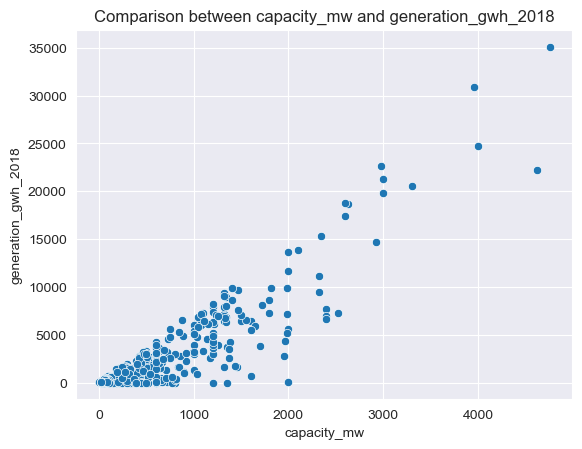

In [32]:
# Comparing capacity_mw and generation_gwh_2018
plt.title("Comparison between capacity_mw and generation_gwh_2018")
sns.scatterplot(x = 'capacity_mw', y = 'generation_gwh_2018', data = df,)
plt.show()

There was a notable surge in electricity generation, measured in gigawatt-hours, and in capacities, quantified in megawatts, during the year 2018.

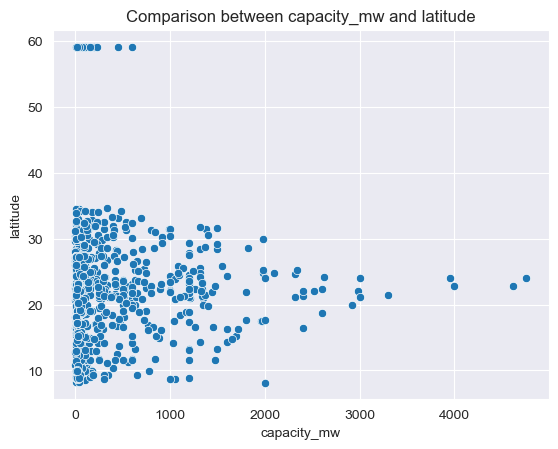

In [33]:
# Comparing capacity_mw and latitude
plt.title("Comparison between capacity_mw and latitude")
sns.scatterplot(x = 'capacity_mw', y = 'latitude', data = df,)
plt.show()

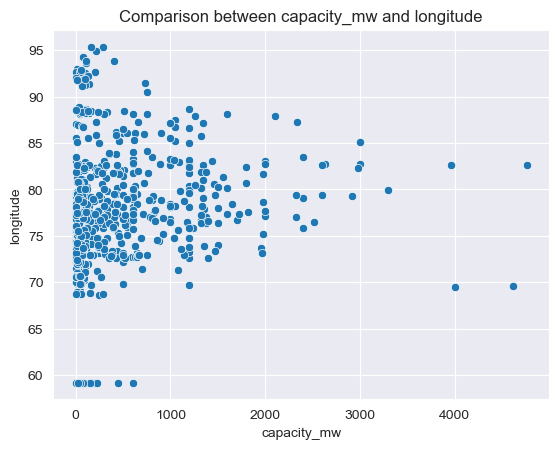

In [34]:
# Comparing capacity_mw and longitude
plt.title("Comparison between capacity_mw and longitude")
sns.scatterplot(x = 'capacity_mw', y = 'longitude', data = df,)
plt.show()

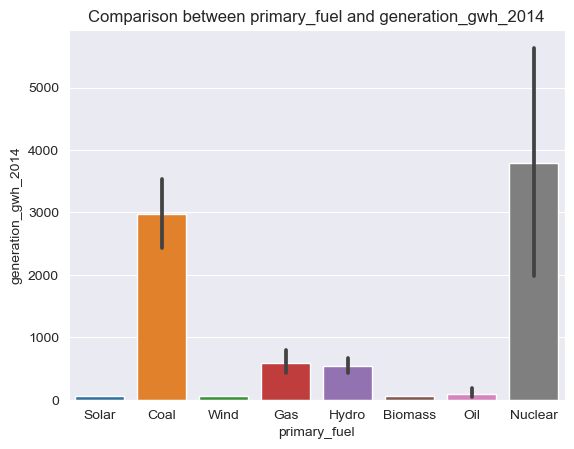

In [35]:
# Comparing between primary_fuel and generation_gwh_2014 
plt.title("Comparison between primary_fuel and generation_gwh_2014")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2014", data = df)
plt.show()

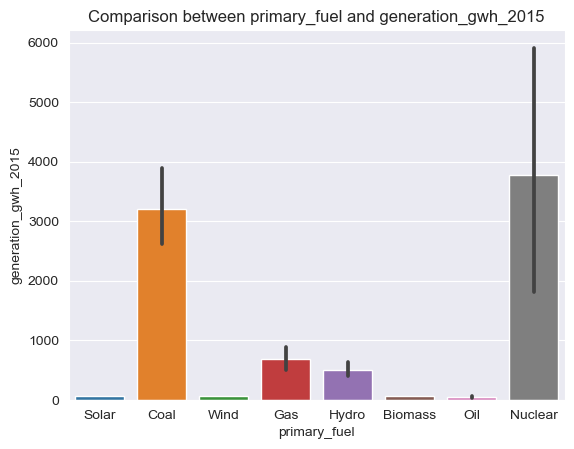

In [36]:
# Comparing between primary_fuel and generation_gwh_2015 
plt.title("Comparison between primary_fuel and generation_gwh_2015")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2015", data = df)
plt.show()

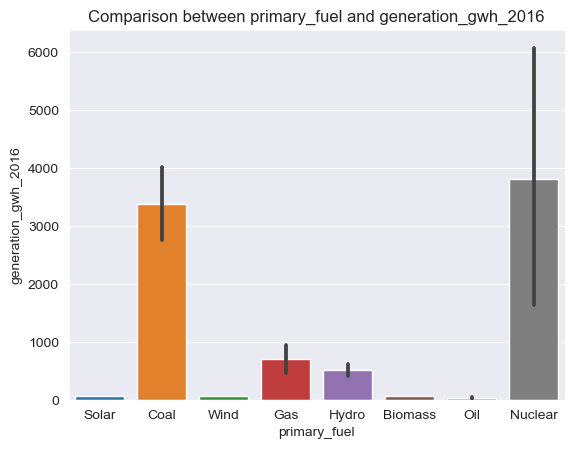

In [37]:
# Comparing between primary_fuel and generation_gwh_2016 
plt.title("Comparison between primary_fuel and generation_gwh_2016")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2016", data = df)
plt.show()

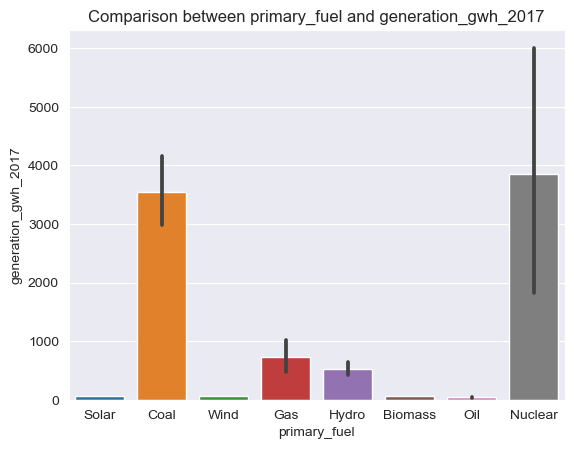

In [38]:
# Comparing between primary_fuel and generation_gwh_2017 
plt.title("Comparison between primary_fuel and generation_gwh_2017")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2017", data = df)
plt.show()

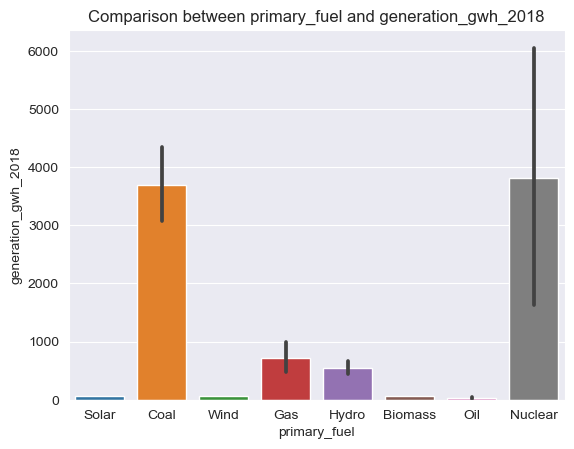

In [39]:
# Comparing between primary_fuel and generation_gwh_2018 
plt.title("Comparison between primary_fuel and generation_gwh_2018")
sns.barplot(x = "primary_fuel", y = "generation_gwh_2018", data = df)
plt.show()

Examining the bar plots above spanning from 2014 to 2018, it is evident that the coal thermal plant exhibited the highest fuel generation, whereas the Nuclear, Gas, and hydro plants delivered performance at an average level. The Solar plant, Wind, Biomass, and oil plants, however, demonstrated considerably lower capacity.

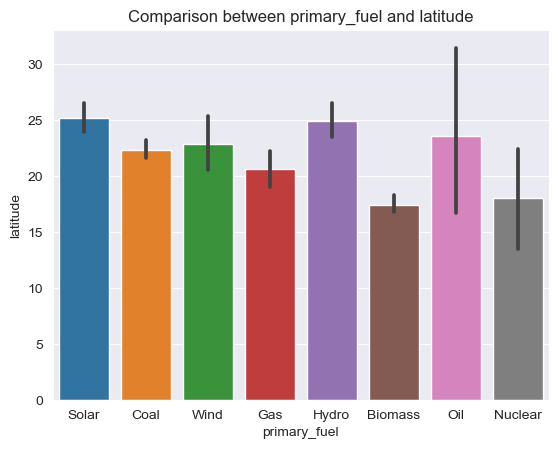

In [40]:
# Comparing between primary_fuel and latitude 
plt.title("Comparison between primary_fuel and latitude")
sns.barplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

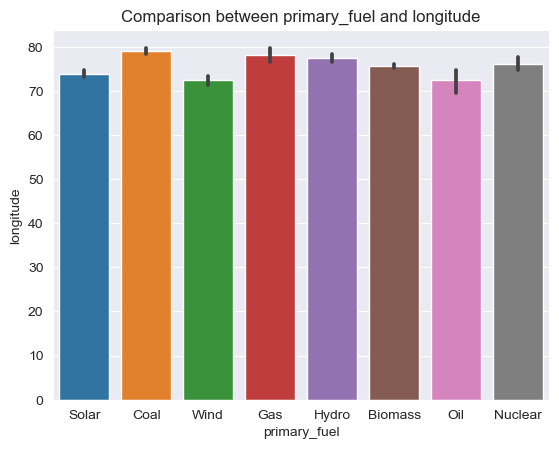

In [41]:
# Comparing between primary_fuel and longitude 
plt.title("Comparison between primary_fuel and longitude")
sns.barplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()

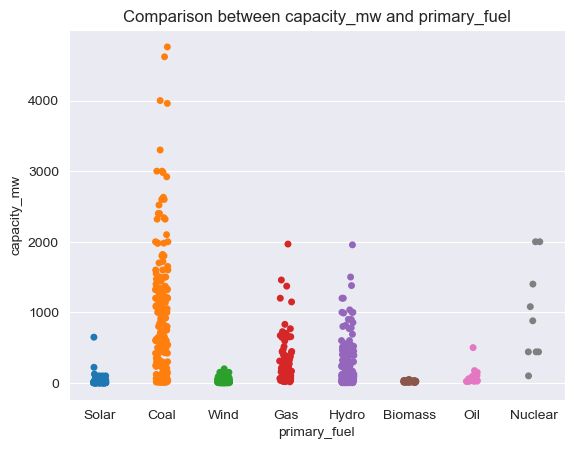

In [42]:
# Comparing capacity_mw and primary_fuel
plt.title("Comparison between capacity_mw and primary_fuel")
sns.stripplot(x = 'primary_fuel', y = 'capacity_mw', data = df,)
plt.show()

Coal generates the highest number of electricity in capacity mega watts.

# Converting categorical to numerical using LabelEncoder.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    object 
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    object 
 6   geolocation_source   907 non-null    object 
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), object(3)
memory usage: 85.2+ KB


In [44]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [45]:
df['geolocation_source'].unique()

array(['National Renewable Energy Laboratory', 'WRI', 'Industry About'],
      dtype=object)

In [46]:
df['source'].unique()

array(['National Renewable Energy Laboratory', 'Ultratech Cement ltd',
       'CDM', 'Central Electricity Authority', 'Hindustan Pvt lt',
       'Dr Ssk ltd', 'Ashok Ssk ltd', 'Shree Sugars ltd', 'Navbharat',
       'Meil.In/P', 'Lancosola', 'Indian Power ltd',
       'Ballarpur Industries ltd', 'Jk Cement ltd', 'India Ltd icl)',
       'Ideal Projects ltd', 'Ugar Works ltd', 'Vishwanath Sugars ltd',
       'Hothur Pvt ltd', 'Janki Corp ltd', 'Mysore Mills ltd',
       'Sunflag Co ltd', 'Varam Pvt ltd', 'Sangam Spinners ltd',
       'Bharat Refinery ltd', 'Binani Industries ltd',
       'Indo Synthetics ltd', 'Ambed K Sugar', 'AES Winfra', 'Sembcorp',
       'Punj Lloyd', 'Hiraco India', 'Moserbaer Solar', 'Lingandwi',
       'LEPL', 'CleanEnerg teLeanenergy', 'Adani Power Limite r Er',
       'Madhav Group', 'Power Private edM/Pdf', 'Acc Acc ltd',
       'Birla Corp ltd', 'Hindustan Zinc ltd', 'Gupta Ltd gepl)',
       'Manikghar Cement co', 'Core Fuels ltd',
       'Maharashtra State

In [47]:
# Encode categorical variables
encoder = LabelEncoder()
df['primary_fuel'] = encoder.fit_transform(df['primary_fuel'])
df['geolocation_source'] = encoder.fit_transform(df['geolocation_source'])
df['source'] = encoder.fit_transform(df['source'])

In [48]:
df['geolocation_source'].unique()

array([1, 2, 0])

In [49]:
# Lets have an overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   latitude             907 non-null    float64
 2   longitude            907 non-null    float64
 3   primary_fuel         907 non-null    int32  
 4   commissioning_year   907 non-null    float64
 5   source               907 non-null    int32  
 6   geolocation_source   907 non-null    int32  
 7   generation_gwh_2014  907 non-null    float64
 8   generation_gwh_2015  907 non-null    float64
 9   generation_gwh_2016  907 non-null    float64
 10  generation_gwh_2017  907 non-null    float64
 11  generation_gwh_2018  907 non-null    float64
dtypes: float64(9), int32(3)
memory usage: 74.5 KB


The columns have now been transformed into numerical values.

**Checking for and Removing the Outliers**

In [50]:
numerical_col = ['generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017','generation_gwh_2018', ] 

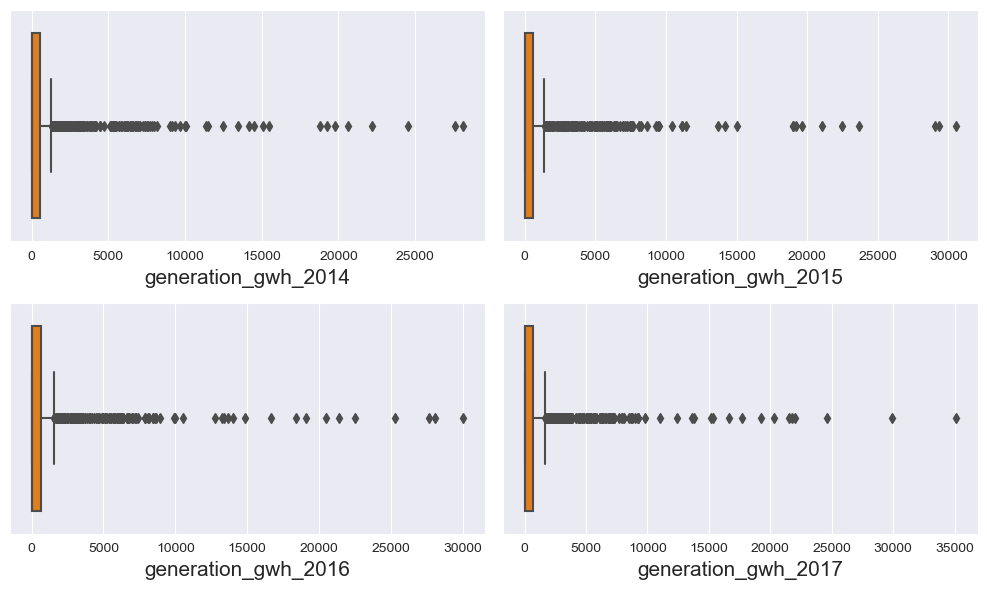

In [51]:
# Lets check the Outliers by plotting boxplot.
plt.figure(figsize = (10,6), facecolor = "white")
plotnumber = 1
for col in numerical_col:
    if plotnumber<=4:
        ax = plt.subplot(2, 2, plotnumber)
        sns.boxplot(df[col], palette = "autumn_r")
        plt.xlabel(col, fontsize = 15)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber+=1
plt.tight_layout()

**Checking the zscore**

In [52]:
z=np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw']]))
print(np.where(z>4))

(array([ 15,  15, 143, 143, 308, 308, 308, 308, 308, 364, 364, 364, 364,
       364, 493, 493, 493, 493, 493, 493, 494, 494, 494, 494, 494, 494,
       648, 648, 648, 648, 648, 648, 657, 657, 657, 657, 657, 695, 695,
       695, 695, 695, 695, 721, 721, 724, 724, 724, 726, 726, 726, 726,
       726, 726, 786, 786, 786, 786, 786, 786, 808, 808, 808, 808, 808,
       808, 880, 880, 880, 880, 880, 880], dtype=int64), array([3, 4, 4, 5, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0, 1,
       2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 5, 0,
       1, 0, 1, 2, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5, 0, 1, 2, 3, 4, 5,
       0, 1, 2, 3, 4, 5], dtype=int64))


In [53]:
z = np.abs(zscore(df[['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','capacity_mw']]))
threshold = 4
df1 = df[(z<4).all(axis = 1)]


In [54]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

Shape of the dataframe before removing outliers:  (907, 12)
Shape of the dataframe after removing outliers:  (892, 12)
Percentage of data loss post outlier removal:  1.6538037486218304


In [55]:
df.shape

(907, 12)

**Checking for and Handling Skewness**

In [56]:
df.skew()

capacity_mw            3.123576
latitude               1.940249
longitude             -0.295883
primary_fuel           0.472251
commissioning_year    -0.328473
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2014    5.018549
generation_gwh_2015    5.292321
generation_gwh_2016    5.014692
generation_gwh_2017    5.010509
generation_gwh_2018    4.874039
dtype: float64

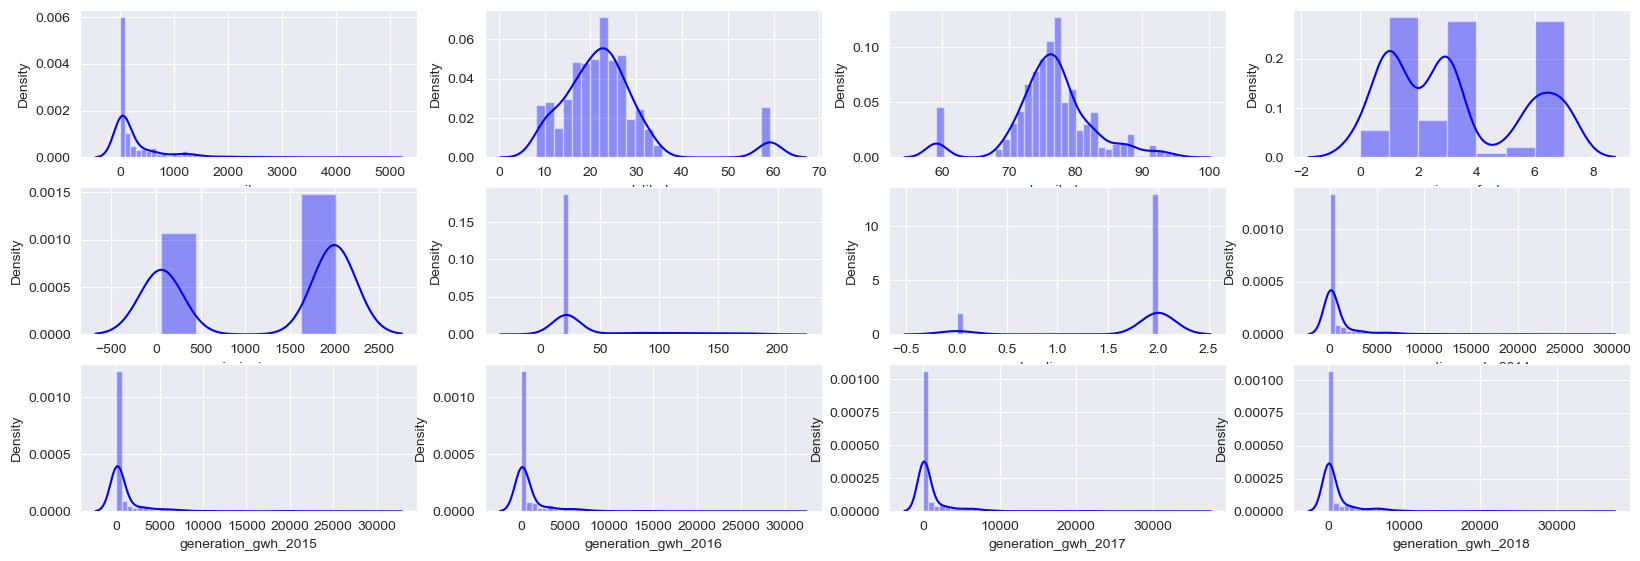

In [57]:
plt.figure(figsize=(20,18))
for i in enumerate(df):
    plt.subplot(8,4,i[0]+1)
    sns.distplot(df[i[1]],color='b')

The capacity_mw, latitude, primary_fuel, source, and the generation variables are right-skewed, while longitude, commissioning_year, and geolocation_source are left-skewed.For this project skewness >+/-0.5 will be treated excluding the object columns. 

In [58]:
df[['capacity_mw',"generation_gwh_2014",'generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

,capacity_mw,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,59.200000,59.200000,59.200000,59.200000,59.200000
1,98.0,59.200000,59.200000,59.200000,59.200000,59.200000
2,39.2,59.200000,59.200000,59.200000,59.200000,59.200000
3,135.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...
902,1600.0,59.200000,0.994875,233.596650,865.400000,686.500000
903,3.0,59.200000,59.200000,59.200000,59.200000,59.200000
904,25.5,59.200000,59.200000,59.200000,59.200000,59.200000
905,80.0,59.200000,59.200000,59.200000,59.200000,59.200000


In [59]:
# Cheking again for skewness
df.skew()

capacity_mw            3.123576
latitude               1.940249
longitude             -0.295883
primary_fuel           0.472251
commissioning_year    -0.328473
source                 1.827373
geolocation_source    -2.159841
generation_gwh_2014    5.018549
generation_gwh_2015    5.292321
generation_gwh_2016    5.014692
generation_gwh_2017    5.010509
generation_gwh_2018    4.874039
dtype: float64

In [60]:
#checking the null values
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [61]:
df.isnull().sum().sum()

0

**VARIABLE SPLITING INTO TARGET(Y) AND FEATURES(X)**

Let's define our independent variable (X) and dependant/target variable y

In [62]:
x=df.drop(['capacity_mw'],axis=1)
y=df['capacity_mw']
print(x.head(),"\n")
print(y.head())

   latitude  longitude  primary_fuel  commissioning_year  source  \
0   28.1839    73.2407             6              2011.0     109   
1   24.7663    74.6090             1                59.2     174   
2   21.9038    69.3732             7                59.2      21   
3   23.8712    91.3602             2              2004.0      22   
4   21.9603    82.4091             1              2015.0      22   

   geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0                   1            59.200000               59.200   
1                   2            59.200000               59.200   
2                   2            59.200000               59.200   
3                   2           617.789264              843.747   
4                   2          3035.550000             5916.370   

   generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
0            59.200000            59.200000            59.200000  
1            59.200000            59.200000           

In [63]:
# Selecting the features and target variable
x = df[['commissioning_year', 'geolocation_source', 'source', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']]
y_fuel = df['primary_fuel']
y_capacity = df['capacity_mw']

In [64]:
#Scaling the X values
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [65]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,0.574834,0.866593,0.230778,0.039120,0.038031,0.040373,0.036064,0.037414
std,0.488437,0.338575,0.234962,0.103604,0.101318,0.103933,0.090429,0.093542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.115789,0.002105,0.001939,0.001972,0.001686,0.001685
50%,0.979579,1.000000,0.115789,0.002105,0.001939,0.001972,0.001686,0.001685
75%,0.992342,1.000000,0.155263,0.019787,0.019612,0.022323,0.020199,0.019574
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### SPLIT INTO TRAIN AND TEST USING THE 70:30 RULE

In [66]:
# Split the data into training and testing sets
x_train, x_test, y_fuel_train, y_fuel_test, y_capacity_train, y_capacity_test = train_test_split(x, y_fuel, y_capacity, test_size=0.2, random_state=42)


# The Machine Learning Model Training,Evaluation and Predictions

# Linear Regression

In [67]:
# Training the model for predicting primary fuel
model_fuel_lr = LinearRegression()
model_fuel_lr.fit(x_train, y_fuel_train)
fuel_prediction_lr = model_fuel_lr.predict(x_test)

In [68]:
# Training the model for predicting capacity_mw
model_capacity_lr = LinearRegression()
model_capacity_lr.fit(x_train, y_capacity_train)
capacity_prediction_lr = model_capacity_lr.predict(x_test)

In [69]:
# LR Model Evaluation for primary_fuel
mse_fuel_lr = mean_squared_error(y_fuel_test, fuel_prediction_lr)
rmse_fuel_lr = np.sqrt(mse_fuel_lr)
mae_fuel_lr = mean_absolute_error(y_fuel_test, fuel_prediction_lr)
r2_fuel_lr = r2_score(y_fuel_test, fuel_prediction_lr)

In [70]:
# Printing the first few predictions for LR
print("Sample Predictions:")
print("Predicted Primary Fuel:", fuel_prediction_lr[:5])
print("Actual Primary Fuel:", y_fuel_test.head().tolist())
print("Predicted Capacity (MW):", capacity_prediction_lr[:5])
print("Actual Capacity (MW):", y_capacity_test.head().tolist())

Sample Predictions:
Predicted Primary Fuel: [2.35539064 4.61299403 2.5523307  2.46069373 2.53489091]
Actual Primary Fuel: [2, 7, 3, 3, 3]
Predicted Capacity (MW): [379.08959989  55.59276283 218.08354493 309.96864981 193.95386881]
Actual Capacity (MW): [187.2, 50.4, 41.4, 770.0, 4.5]


Linear Regressor - Primary Fuel:
Mean Squared Error (Primary Fuel): 2.6488157448470635
Root Mean Squared Error (Primary Fuel): 1.6275182778841728
Mean Absolute Error (Primary Fuel): 1.2827745946537976
R-squared Score (Primary Fuel): 0.44097958144965266


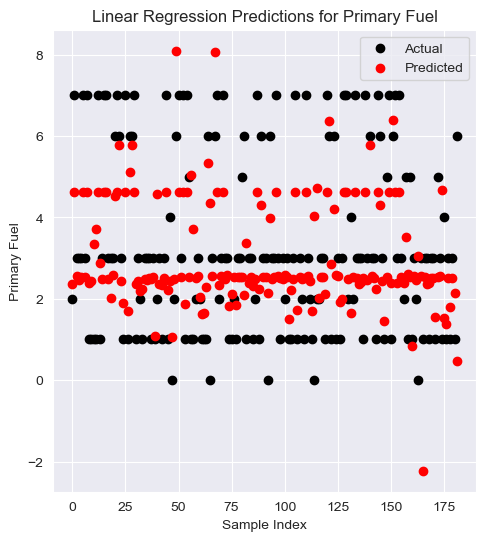

In [71]:
# Print results-fuel
print('Linear Regressor - Primary Fuel:')
print(f'Mean Squared Error (Primary Fuel): {mse_fuel_lr}')
print(f'Root Mean Squared Error (Primary Fuel): {rmse_fuel_lr}')
print(f'Mean Absolute Error (Primary Fuel): {mae_fuel_lr}')
print(f'R-squared Score (Primary Fuel): {r2_fuel_lr}')

# Visualizing the Predictions for Primary Fuel
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(np.arange(len(y_fuel_test)), y_fuel_test, color='black', label='Actual')
plt.scatter(np.arange(len(fuel_prediction_lr)), fuel_prediction_lr, color='red', label='Predicted')
plt.title('Linear Regression Predictions for Primary Fuel')
plt.xlabel('Sample Index')
plt.ylabel('Primary Fuel')
plt.legend()

In [72]:
# LR Model Evaluation for capacity_mw
mse_capacity_lr = mean_squared_error(y_capacity_test, capacity_prediction_lr)
rmse_capacity_lr = np.sqrt(mse_capacity_lr)
mae_capacity_lr = mean_absolute_error(y_capacity_test, capacity_prediction_lr)
r2_capacity_lr = r2_score(y_capacity_test, capacity_prediction_lr)


Linear Regressor - Capacity (MW):
Mean Squared Error (Capacity): 54297.45442256296
Root Mean Squared Error (Capacity): 233.01814183140968
Mean Absolute Error (Capacity): 139.69258428604283
R-squared Score (Capacity): 0.8218521726323093


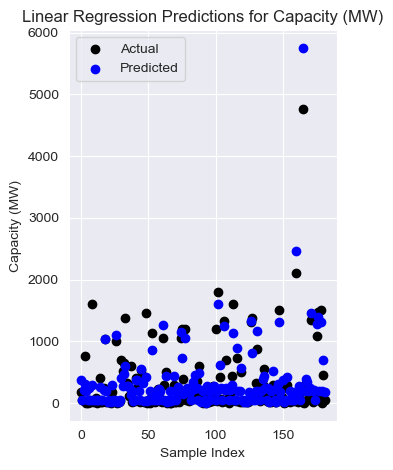

In [73]:
# LR results-capacity_mw
print('\nLinear Regressor - Capacity (MW):')
print(f'Mean Squared Error (Capacity): {mse_capacity_lr}')
print(f'Root Mean Squared Error (Capacity): {rmse_capacity_lr}')
print(f'Mean Absolute Error (Capacity): {mae_capacity_lr}')
print(f'R-squared Score (Capacity): {r2_capacity_lr}')

# Visualizing Predictions for Capacity (MW)
plt.subplot(1, 2, 2)
plt.scatter(np.arange(len(y_capacity_test)), y_capacity_test, color='black', label='Actual')
plt.scatter(np.arange(len(capacity_prediction_lr)), capacity_prediction_lr, color='blue', label='Predicted')
plt.title('Linear Regression Predictions for Capacity (MW)')
plt.xlabel('Sample Index')
plt.ylabel('Capacity (MW)')
plt.legend()

plt.tight_layout()
plt.show()

## Random Forest Regressor.

In [74]:
# Training the model for predicting primary fuel using Random Forest Regressor
model_fuel_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_fuel_rf.fit(x_train, y_fuel_train)
fuel_prediction_rf = model_fuel_rf.predict(x_test)

In [75]:
# Training the model for predicting capacity_mw using Random Forest Regressor
model_capacity_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_capacity_rf.fit(x_train, y_capacity_train)
capacity_prediction_rf = model_capacity_rf.predict(x_test)

In [76]:
# Evaluating the RF models for primary fuel
mse_fuel_rf = mean_squared_error(y_fuel_test, fuel_prediction_rf)
rmse_fuel_rf = np.sqrt(mse_fuel_rf)
mae_fuel_rf = mean_absolute_error(y_fuel_test, fuel_prediction_rf)
r2_fuel_rf = r2_score(y_fuel_test, fuel_prediction_rf)

Random Forest Regressor - Primary Fuel:
Mean Squared Error: 0.6229873772893773
Root Mean squared Error: 0.789295494279156
Mean Absolute Error: 0.41655494505494506
R2 Score: 0.8685213703212872


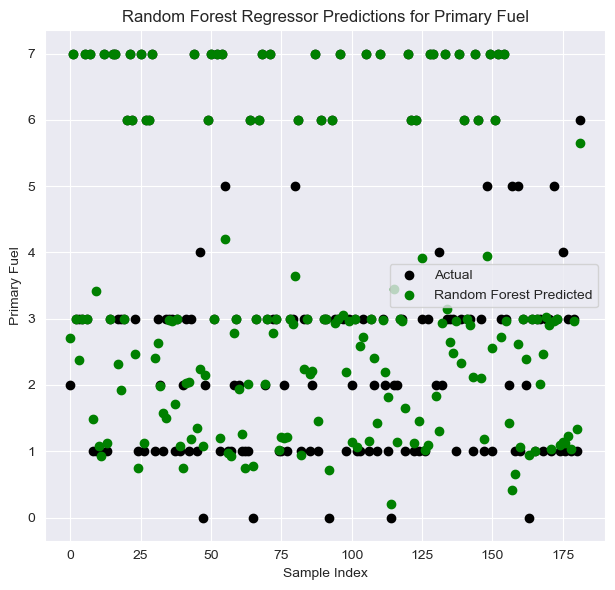

In [77]:
# Print results
print('Random Forest Regressor - Primary Fuel:')
print(f'Mean Squared Error: {mse_fuel_rf}')
print(f'Root Mean squared Error: {rmse_fuel_rf}')
print(f'Mean Absolute Error: {mae_fuel_rf}')
print(f'R2 Score: {r2_fuel_rf}')

# Visualizing the RF Predictions for Primary Fuel
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(np.arange(len(y_fuel_test)), y_fuel_test, color='black', label='Actual')
plt.scatter(np.arange(len(fuel_prediction_rf)), fuel_prediction_rf, color='green', label='Random Forest Predicted')
plt.title('Random Forest Regressor Predictions for Primary Fuel')
plt.xlabel('Sample Index')
plt.ylabel('Primary Fuel')
plt.legend()

plt.tight_layout()
plt.show()

In [78]:
# RF Model Evaluation for capacity_mw
mse_capacity_rf = mean_squared_error(y_capacity_test, capacity_prediction_rf)
rmse_capacity_rf = np.sqrt(mse_capacity_rf)
mae_capacity_rf = mean_absolute_error(y_capacity_test, capacity_prediction_rf)
r2_capacity_rf = r2_score(y_capacity_test, capacity_prediction_rf)


Random Forest Regressor - Capacity (MW):
Mean Squared Error: 37819.54345059684
Root Mean Squared Error: 194.47247478909924
Mean Absolute Error: 98.91120590012669
R2 Score: 0.8759155549848007


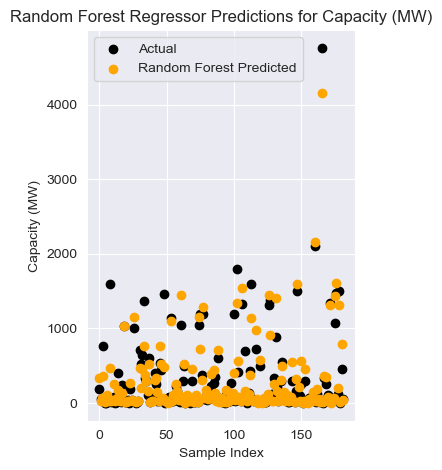

In [79]:
print('\nRandom Forest Regressor - Capacity (MW):')
print(f'Mean Squared Error: {mse_capacity_rf}')
print(f'Root Mean Squared Error: {rmse_capacity_rf}')
print(f'Mean Absolute Error: {mae_capacity_rf}')
print(f'R2 Score: {r2_capacity_rf}')

# Visualizing Predictions for Capacity (MW)
plt.subplot(1, 2, 2)
plt.scatter(np.arange(len(y_capacity_test)), y_capacity_test, color='black', label='Actual')
plt.scatter(np.arange(len(capacity_prediction_rf)), capacity_prediction_rf, color='orange', label='Random Forest Predicted')
plt.title('Random Forest Regressor Predictions for Capacity (MW)')
plt.xlabel('Sample Index')
plt.ylabel('Capacity (MW)')
plt.legend()

plt.tight_layout()
plt.show()

# Decision Tree Regressor

In [80]:
# Training the model for predicting primary fuel using Decision Tree Regressor
model_fuel_dt = DecisionTreeRegressor()
model_fuel_dt.fit(x_train, y_fuel_train)
fuel_prediction_dt = model_fuel_dt.predict(x_test)

In [81]:
# Training the model for predicting capacity_mw using Decision Tree Regressor
model_capacity_dt = DecisionTreeRegressor()
model_capacity_dt.fit(x_train, y_capacity_train)
capacity_prediction_dt = model_capacity_dt.predict(x_test)

In [82]:
# Calculating the MSE,RMSE, MAE, and R2 Score for Primary Fuel
mse_fuel_dt = mean_squared_error(y_fuel_test, fuel_prediction_dt)
rmse_fuel_dt = np.sqrt(mean_squared_error(y_fuel_test, fuel_prediction_dt))
mae_fuel_dt = mean_absolute_error(y_fuel_test, fuel_prediction_dt)
r2_fuel_dt = r2_score(y_fuel_test, fuel_prediction_dt)

Decision Tree Regressor Metrics for Primary Fuel:
Mean Squared Error: 1.164835164835165
Root Mean Squared Error: 1.079275296129382
Mean Absolute Error: 0.5274725274725275
R-squared Score: 0.7541668790458229


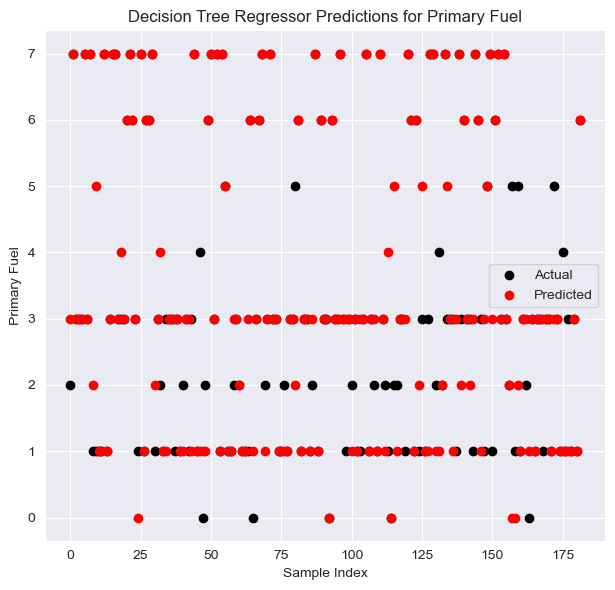

In [83]:
# Print Decisionm Tree Regressor results for Primary Fuel
print("Decision Tree Regressor Metrics for Primary Fuel:")
print(f'Mean Squared Error: {mse_fuel_dt}')
print(f'Root Mean Squared Error: {rmse_fuel_dt}')
print(f'Mean Absolute Error: {mae_fuel_dt}')
print(f'R-squared Score: {r2_fuel_dt}')

# Visualizing Predictions for Primary Fuel
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(np.arange(len(y_fuel_test)), y_fuel_test, color='black', label='Actual')
plt.scatter(np.arange(len(fuel_prediction_dt)), fuel_prediction_dt, color='red', label='Predicted')
plt.title('Decision Tree Regressor Predictions for Primary Fuel')
plt.xlabel('Sample Index')
plt.ylabel('Primary Fuel')
plt.legend()

plt.tight_layout()
plt.show()

In [84]:
# Calculating the MSE,RMSE,MAE, and R2 Score for Capacity (MW)
mse_capacity_dt = mean_squared_error(y_capacity_test, capacity_prediction_dt)
rmse_capacity_dt = np.sqrt(mean_squared_error(y_capacity_test, capacity_prediction_dt))
mae_capacity_dt = mean_absolute_error(y_capacity_test, capacity_prediction_dt)
r2_capacity_dt = r2_score(y_capacity_test, capacity_prediction_dt)


Decision Tree Regressor Metrics for Capacity (MW):
Mean Squared Error: 47115.564242704386
Root Mean Squared Error: 217.0611993026492
Mean Absolute Error: 106.18133757470599
R-squared Score: 0.8454156738229561


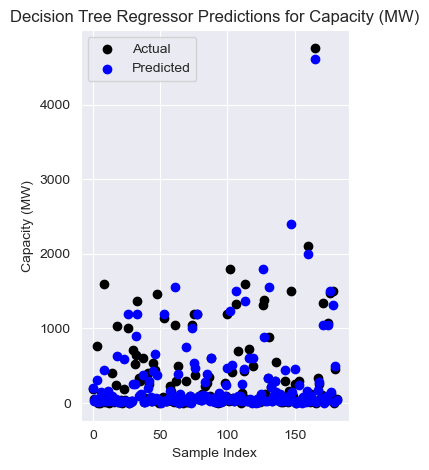

In [85]:
# Print Decision Tree Regressor results for Capacity_mw
print("\nDecision Tree Regressor Metrics for Capacity (MW):")
print(f'Mean Squared Error: {mse_capacity_dt}')
print(f'Root Mean Squared Error: {rmse_capacity_dt}')
print(f'Mean Absolute Error: {mae_capacity_dt}')
print(f'R-squared Score: {r2_capacity_dt}')

# Visualizing Predictions for Decision Tree Regressor Capacity (MW)
plt.subplot(1, 2, 2)
plt.scatter(np.arange(len(y_capacity_test)), y_capacity_test, color='black', label='Actual')
plt.scatter(np.arange(len(capacity_prediction_dt)), capacity_prediction_dt, color='blue', label='Predicted')
plt.title('Decision Tree Regressor Predictions for Capacity (MW)')
plt.xlabel('Sample Index')
plt.ylabel('Capacity (MW)')
plt.legend()

plt.tight_layout()
plt.show()

# Support Vector Machine(SVM) Regressor Model

In [86]:
# Training the model for predicting primary fuel using SVM Regressor
model_fuel_svm = SVR()
model_fuel_svm.fit(x_train, y_fuel_train)
fuel_prediction_svm = model_fuel_svm.predict(x_test)

In [87]:
# Training the model for predicting capacity_mw using SVM Regressor
model_capacity_svm = SVR()
model_capacity_svm.fit(x_train, y_capacity_train)
capacity_prediction_svm = model_capacity_svm.predict(x_test)

In [88]:
# Calculating(SVM) the MSE,RMSE, MAE, and R2 Score for Primary Fuel
mse_fuel_svm = mean_squared_error(y_fuel_test, fuel_prediction_svm)
rmse_fuel_svm = np.sqrt(mean_squared_error(y_fuel_test, fuel_prediction_svm))
mae_fuel_svm = mean_absolute_error(y_fuel_test, fuel_prediction_svm)
r2_fuel_svm = r2_score(y_fuel_test, fuel_prediction_svm)

SVM Metrics for Primary Fuel:
Mean Squared Error: 2.031118103345739
Root Mean Squared Error: 1.4251730082154022
Mean Absolute Error: 0.7597242372094298
R-squared Score: 0.5713418366428955


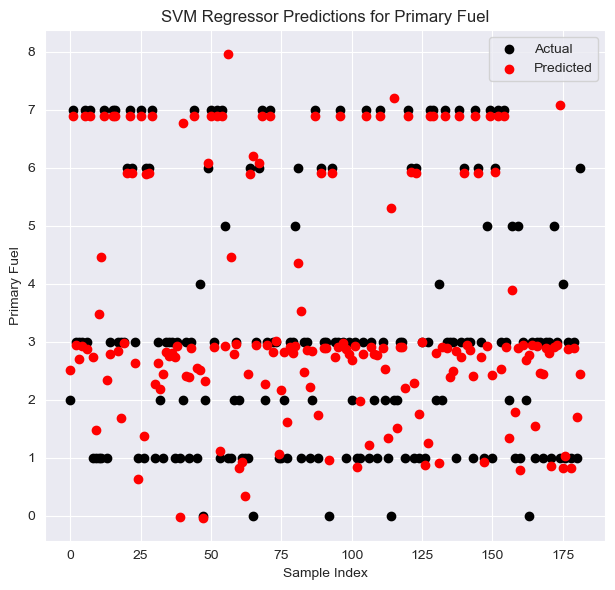

In [89]:
# SVM results
print("SVM Metrics for Primary Fuel:")
print(f'Mean Squared Error: {mse_fuel_svm}')
print(f'Root Mean Squared Error: {rmse_fuel_svm}')
print(f'Mean Absolute Error: {mae_fuel_svm}')
print(f'R-squared Score: {r2_fuel_svm}')

# Visualizing Predictions for Primary Fuel
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(np.arange(len(y_fuel_test)), y_fuel_test, color='black', label='Actual')
plt.scatter(np.arange(len(fuel_prediction_svm)), fuel_prediction_svm, color='red', label='Predicted')
plt.title('SVM Regressor Predictions for Primary Fuel')
plt.xlabel('Sample Index')
plt.ylabel('Primary Fuel')
plt.legend()

plt.tight_layout()
plt.show()

In [90]:
# Calculating(SVM) MSE,RMSE,MAE, and R2 Score for Capacity (MW)
mse_capacity_svm = mean_squared_error(y_capacity_test, capacity_prediction_svm)
rmse_capacity_svm = np.sqrt(mean_squared_error(y_capacity_test, capacity_prediction_svm))
mae_capacity_svm = mean_absolute_error(y_capacity_test, capacity_prediction_svm)
r2_capacity_svm = r2_score(y_capacity_test, capacity_prediction_svm)


 SVM Metrics for Capacity (MW):
Mean Squared Error: 335234.04322377936
Root Mean Squared Error: 578.9939923900587
Mean Absolute Error: 265.0924734752987
R-squared Score: -0.09988980321674279


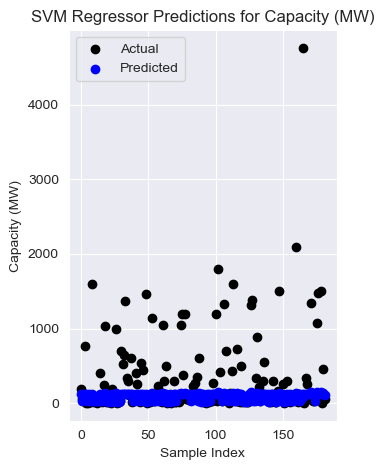

In [91]:
# SVM results for capacity_mw
print("\n SVM Metrics for Capacity (MW):")
print(f'Mean Squared Error: {mse_capacity_svm}')
print(f'Root Mean Squared Error: {rmse_capacity_svm}')
print(f'Mean Absolute Error: {mae_capacity_svm}')
print(f'R-squared Score: {r2_capacity_svm}')

# Visualizing Predictions for Capacity (MW)
plt.subplot(1, 2, 2)
plt.scatter(np.arange(len(y_capacity_test)), y_capacity_test, color='black', label='Actual')
plt.scatter(np.arange(len(capacity_prediction_svm)), capacity_prediction_svm, color='blue', label='Predicted')
plt.title('SVM Regressor Predictions for Capacity (MW)')
plt.xlabel('Sample Index')
plt.ylabel('Capacity (MW)')
plt.legend()

plt.tight_layout()
plt.show()

# Gradient Boosting Regressor

In [92]:
# Training the model for predicting primary fuel using GBR
model_fuel_gb = GradientBoostingRegressor()
model_fuel_gb.fit(x_train, y_fuel_train)
fuel_prediction_gb = model_fuel_gb.predict(x_test)

In [93]:
# Training the model for predicting capacity_mw using GBR
model_capacity_gb = GradientBoostingRegressor()
model_capacity_gb.fit(x_train, y_capacity_train)
capacity_prediction_gb = model_capacity_gb.predict(x_test)

GBR Metrics for Primary Fuel:
Mean Squared Error: 0.6132343636673953
Root Mean Squared Error: 0.7830928193179881
Mean Absolute Error: 0.46917780758882216
R-squared Score: 0.8705796991301875


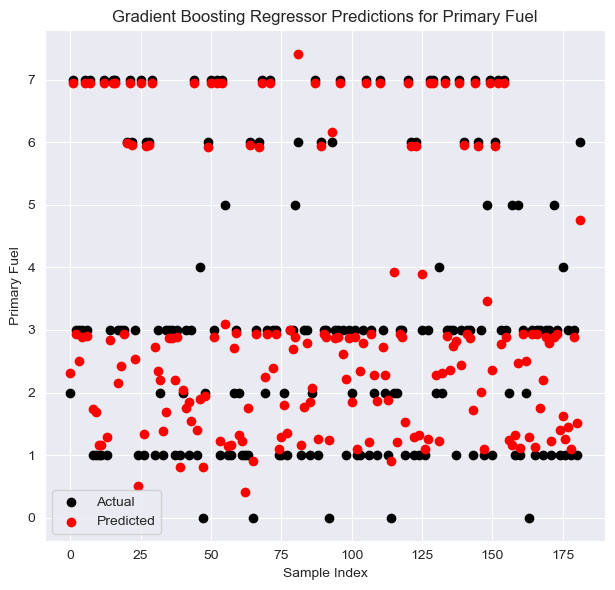

In [94]:
# Calculating the (GBR) MSE,RMSE, MAE, and R2 Score for Primary Fuel
mse_fuel_gb = mean_squared_error(y_fuel_test, fuel_prediction_gb)
rmse_fuel_gb = np.sqrt(mean_squared_error(y_fuel_test, fuel_prediction_gb))
mae_fuel_gb = mean_absolute_error(y_fuel_test, fuel_prediction_gb)
r2_fuel_gb = r2_score(y_fuel_test, fuel_prediction_gb)

print("GBR Metrics for Primary Fuel:")
print(f'Mean Squared Error: {mse_fuel_gb}')
print(f'Root Mean Squared Error: {rmse_fuel_gb}')
print(f'Mean Absolute Error: {mae_fuel_gb}')
print(f'R-squared Score: {r2_fuel_gb}')

# Visualizing Predictions for Primary Fuel
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(np.arange(len(y_fuel_test)), y_fuel_test, color='black', label='Actual')
plt.scatter(np.arange(len(fuel_prediction_gb)), fuel_prediction_gb, color='red', label='Predicted')
plt.title('Gradient Boosting Regressor Predictions for Primary Fuel')
plt.xlabel('Sample Index')
plt.ylabel('Primary Fuel')
plt.legend()

plt.tight_layout()
plt.show()


GBR Metrics for Capacity (MW):
Mean Squared Error: 45829.6034585958
Root Mean Squared Error: 594.5671709845844
Mean Absolute Error: 109.4144856544609
R-squared Score: 0.849634860932284


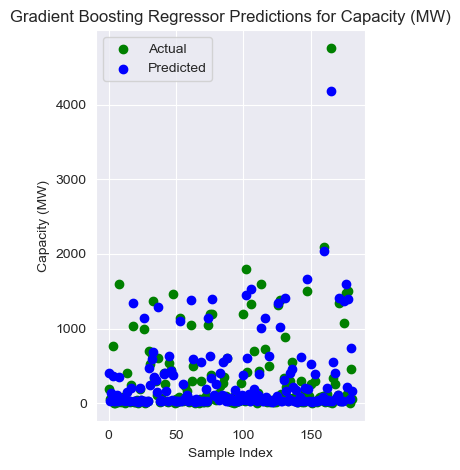

In [95]:
# Calculating the (GBR) MSE,RMSE, MAE, and R2 Score for Capacity (MW)
mse_capacity_gb = mean_squared_error(y_capacity_test, capacity_prediction_gb)
rmse_capacity_gb = np.sqrt(mean_squared_error(y_fuel_test, capacity_prediction_gb))
mae_capacity_gb = mean_absolute_error(y_capacity_test, capacity_prediction_gb)
r2_capacity_gb = r2_score(y_capacity_test, capacity_prediction_gb)

print("\nGBR Metrics for Capacity (MW):")
print(f'Mean Squared Error: {mse_capacity_gb}')
print(f'Root Mean Squared Error: {rmse_capacity_gb}')
print(f'Mean Absolute Error: {mae_capacity_gb}')
print(f'R-squared Score: {r2_capacity_gb}')

# Visualizing Predictions for Capacity (MW)
plt.subplot(1, 2, 2)
plt.scatter(np.arange(len(y_capacity_test)), y_capacity_test, color='green', label='Actual')
plt.scatter(np.arange(len(capacity_prediction_gb)), capacity_prediction_gb, color='blue', label='Predicted')
plt.title('Gradient Boosting Regressor Predictions for Capacity (MW)')
plt.xlabel('Sample Index')
plt.ylabel('Capacity (MW)')
plt.legend()

plt.tight_layout()
plt.show()

# Cross Validation

In [96]:
# Creating k-fold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [97]:
# Linear Regression
lr_model = LinearRegression()
lr_cv_scores = cross_val_score(lr_model, x, y_capacity, scoring='neg_mean_squared_error', cv=kf)
lr_cv_mse = -lr_cv_scores.mean()

In [98]:
# Random Forest Regressor
rf_model = RandomForestRegressor()
rf_cv_scores = cross_val_score(rf_model, x, y_capacity, scoring='neg_mean_squared_error', cv=kf)
rf_cv_mse = -rf_cv_scores.mean()

In [99]:
# Decision Tree Regressor
dt_model = DecisionTreeRegressor()
dt_cv_scores = cross_val_score(dt_model, x, y_capacity, scoring='neg_mean_squared_error', cv=kf)
dt_cv_mse = -dt_cv_scores.mean()

In [100]:
# Support Vector Machine (SVM) Regressor
svm_model = SVR()
svm_cv_scores = cross_val_score(svm_model, x, y_capacity, scoring='neg_mean_squared_error', cv=kf)
svm_cv_mse = -svm_cv_scores.mean()

In [101]:
# Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_cv_scores = cross_val_score(gb_model, x, y_capacity, scoring='neg_mean_squared_error', cv=kf)
gb_cv_mse = -gb_cv_scores.mean()

In [102]:
# Print the Cross Validation results
print("Cross-Validation Mean Squared Error:")
print(f'Linear Regression: {lr_cv_mse}')
print(f'Random Forest Regressor: {rf_cv_mse}')
print(f'Decision Tree Regressor: {dt_cv_mse}')
print(f'SVM Regressor: {svm_cv_mse}')
print(f'Gradient Boosting Regressor: {gb_cv_mse}')

Cross-Validation Mean Squared Error:
Linear Regression: 59373.77965285776
Random Forest Regressor: 47756.9357190456
Decision Tree Regressor: 88466.09043943649
SVM Regressor: 384342.0601433117
Gradient Boosting Regressor: 52708.93274574005


The Random Forest Regressor stands out as the most efficient option among the models explored, offering a favorable combination of simplicity and performance.


# Summary and Conclusion

The Random Forest Regressor excels, outperforming Linear Regression, Decision Tree, SVM, and Gradient Boosting models in predicting Primary_Fuel and Capacity_mw. It achieves higher R-squared values (0.87, 0.88), indicating superior fit, and lower error metrics. Decision Tree and Gradient Boosting also perform well, while Linear Regression and SVM show consistent but potentially improvable results, particularly in predicting Capacity_mw. The Random Forest Regressor emerges as the most effective model, demonstrating robust predictive capabilities for both dependent variables, Primary_Fuel and Capacity_mw, making it the preferred choice among the considered regression models.